## Loan Application Status Prediction
### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


### Importing Necessary Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Database
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In above Dataset have 614 Rows and 13 Columns.


In [6]:
#finding datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


 there are total 13 columns in which 4 columns have float64, one column has int64 and 8 columns have obeject datatype

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

In [10]:
# there is a unique id columns Loan_ID so now drop it because this columns not given any information.
df = df.drop(['Loan_ID'],axis=1)

In [11]:
#now finding null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

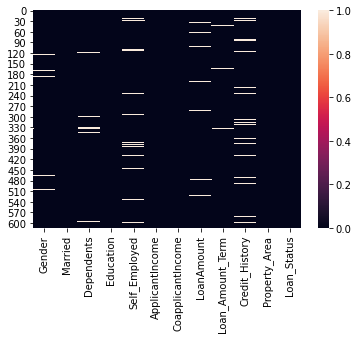

In [13]:
sns.heatmap(df.isnull())

in below columns we found null values we will tret this letter.  

Gender-               13,
Married-               3,
Dependents-           15,
Self_Employed-        32,
LoanAmount-           22,
Loan_Amount_Term-     14,
Credit_History-       50

In [14]:
# Summarizing the dataset in statistic format
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- We can see that the count of column is not equal so there are missing values that needs to be treated.
- Minimum value in loan amount is 9 and Maximum loan amount is 700. 
- In Applicantincome and Coapplicant income column std is high as compare to mean so there is some problem

### Treating missing values
Replacing the missing values with mode method because the either of the class is highly greater than other class.

In [15]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Education'].fillna(df['Gender'].mode()[0], inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True) # Replacing with median because it is not normally distributed.

In [18]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode().values[0])

In [19]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 Now we can see that there are no null or missing values in the dataset.
 
 
 #### Target variable
 

In [20]:
#Target Variable
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### Independent Variable

In [21]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [22]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [23]:
df['Dependents'].value_counts()


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [25]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [26]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

### Exploratory Data Anaylsis(EDA)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

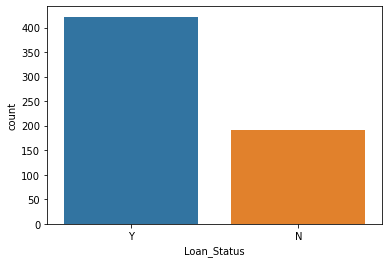

In [28]:
#Target Variable
sns.countplot(df['Loan_Status'])

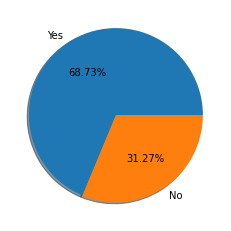

In [29]:
# Pie chart for class variable Loan Status
labels='Yes','No'
fig,ax=plt.subplots()
ax.pie(df['Loan_Status'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

Arround 69% or 422 Applicants got Approvals for Loan.

<AxesSubplot:xlabel='Gender', ylabel='count'>

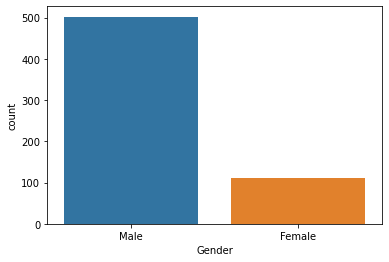

In [30]:
sns.countplot(df['Gender'])

Male number of applicants i.e 489 are much higher than female applicants which are 112.



<AxesSubplot:xlabel='Married', ylabel='count'>

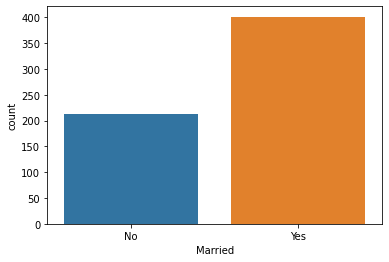

In [32]:
sns.countplot(df['Married'])

There are approximately 400 applicants which are married.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

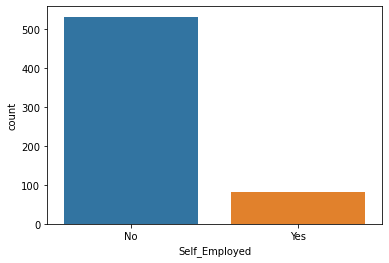

In [33]:
sns.countplot(df['Self_Employed'])

There are only 82 applicants which are self employed.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

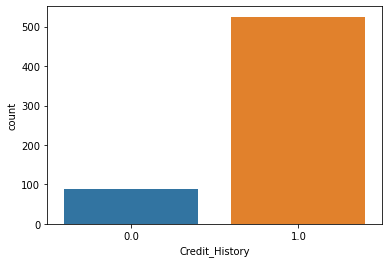

In [35]:
sns.countplot(df['Credit_History'])

More than 80% Applicants have a Good Credit Score.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

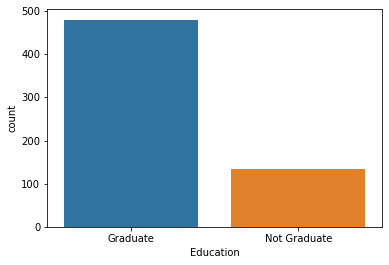

In [37]:
sns.countplot(df['Education'])
df['Education'].value_counts()

Applicants who are graduate are 480 in total.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

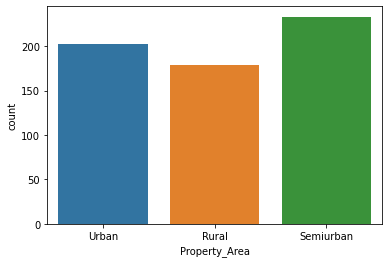

In [38]:
sns.countplot(df['Property_Area'])

Most number of applicants are from Semiurban followed by Urban

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

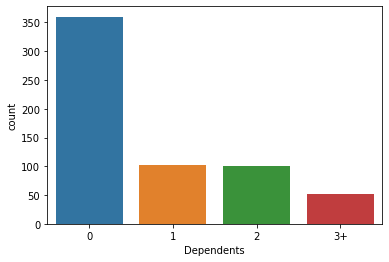

In [40]:
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

Maximum number of applicants dont have dependents.

In [41]:
df.select_dtypes(['int64','float64']).head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


### Plotting Box plot for all numerical features

In [42]:
Numerical=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

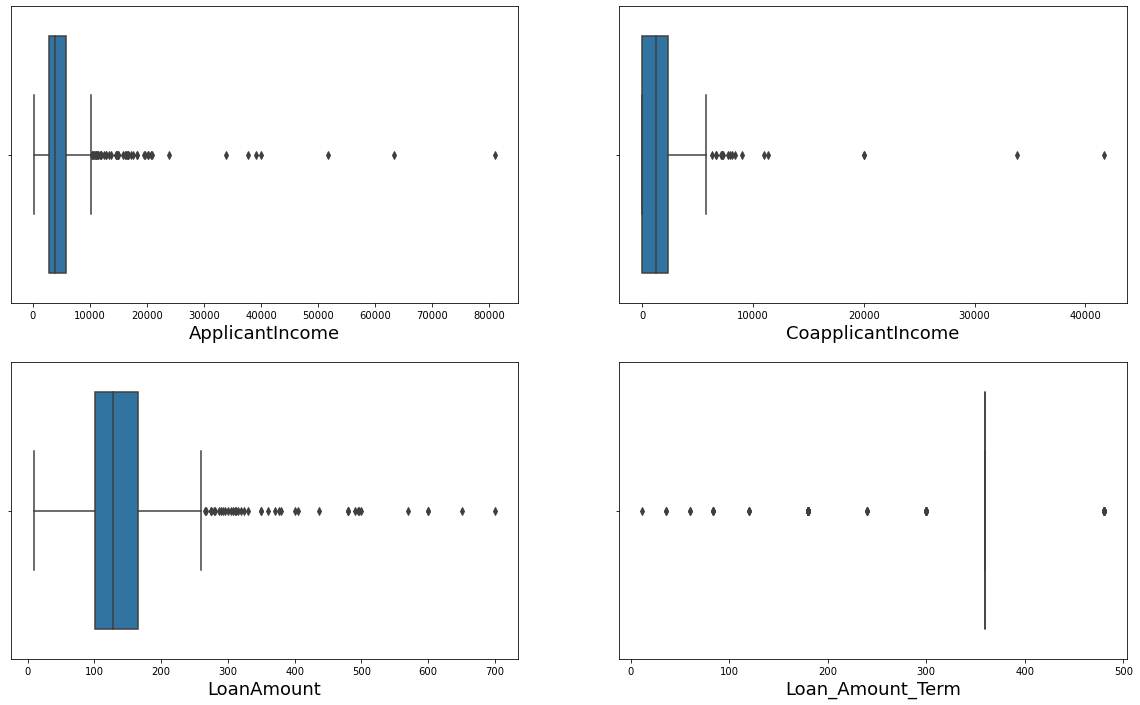

In [44]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in df[Numerical]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

- Outliers are clearly visible in box plot above.
- Major outlier are present in LoanAmount,Applicant Income, Coapplicant income and Loan_Amount Term.
- Outier indicates that the data is not normally distributed.


### Plotting distribution plot for all features

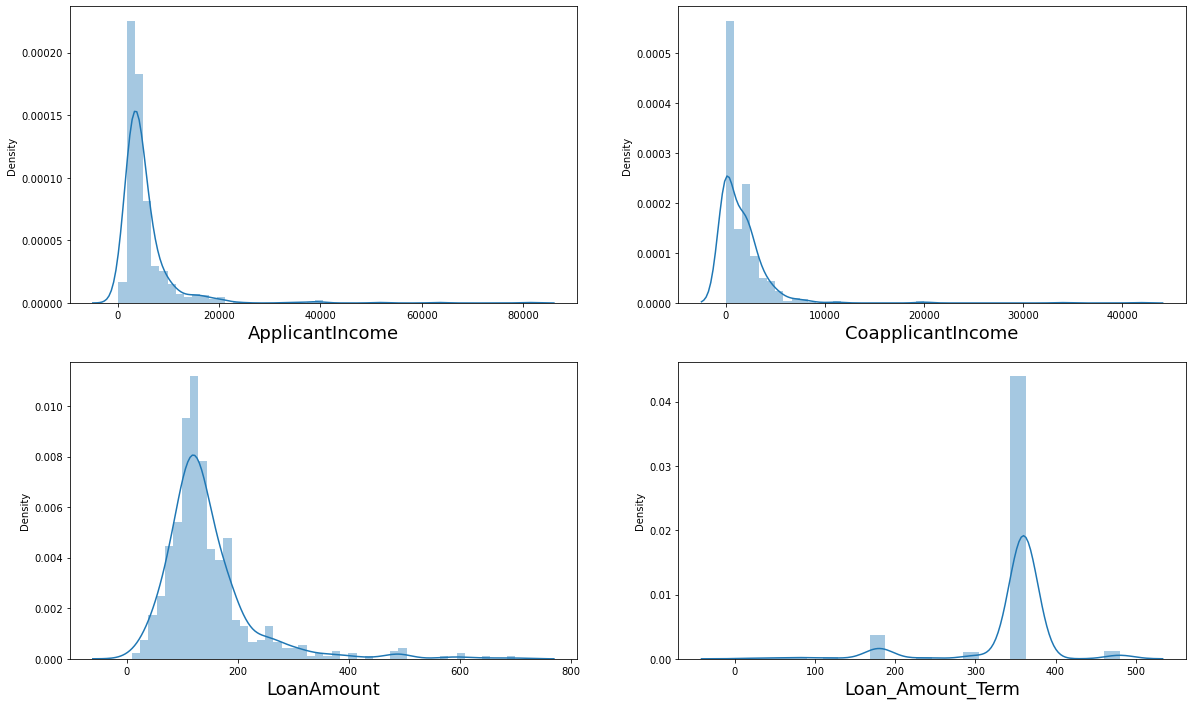

In [45]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in df[Numerical]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

- Applicant income,Coapplicant income and Loan Amount are showing positive righ skewed distribution.
- Loan Amount Term is showing the left skewed distribution.
- Log transformation can be used to remove the skeweness.


### Bivariate Anaylsis

<AxesSubplot:xlabel='Gender', ylabel='count'>

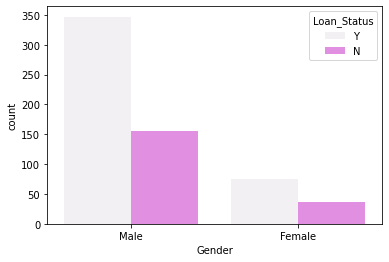

In [47]:
#Count of Loan Approved or not Approved based on Gender.
sns.countplot(x='Gender', hue='Loan_Status', data=df,color='Violet')

Applicants whose loan approved are majority of males. 

<AxesSubplot:xlabel='Married', ylabel='count'>

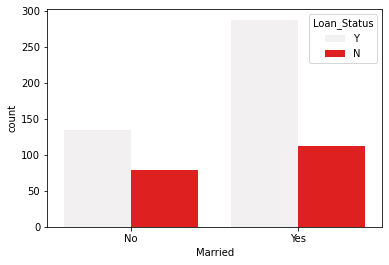

In [49]:
#Count of loan approved or not based on Marital Status
sns.countplot(x='Married', hue='Loan_Status', data=df,color='Red')

Majority of Loan approved applicants are married peoples.



<AxesSubplot:xlabel='count', ylabel='Dependents'>

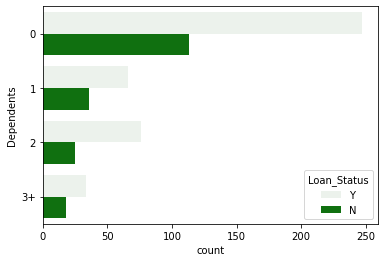

In [50]:
# Loan Approved or not Approved based on Dependents.
sns.countplot(y='Dependents', hue='Loan_Status', data=df,color='Green')

Applicants who have 0 depenedents are more likely to get loan approved.

<AxesSubplot:xlabel='Education', ylabel='count'>

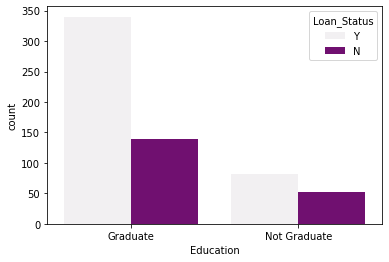

In [51]:
# Loan Approved or not Approved based on Education.
sns.countplot(x='Education', hue='Loan_Status', data=df,color='purple')

The graduate people are more likely to get loan approved than non graduate one.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

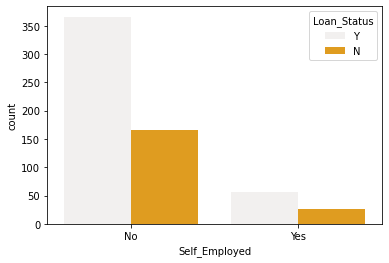

In [52]:
# Loan Approved or not Approved based on Self Employed or not.
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df,color='Orange')

Self employed people have very less chances of getting loan aprroved.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

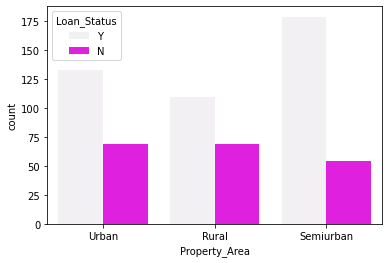

In [53]:
# Loan Approved or not Approved based on Property area.
sns.countplot(x='Property_Area', hue='Loan_Status', data=df,color='Magenta')


More number of people are from semiurban area and are likely to get loan approved.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

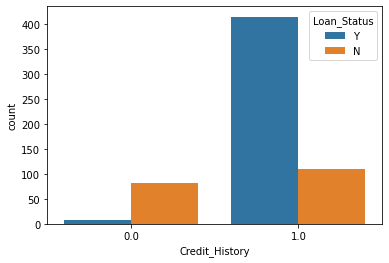

In [54]:
# Loan Approved or not Approved based on Credit History.
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

Applicants who have credit history of 1 have more than 80 percent chances of getting loan approved and people who credit score significantly very less chances of loan getting approved.

#### Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object': # encoding all categorical columns
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Multivariate Anaylsis


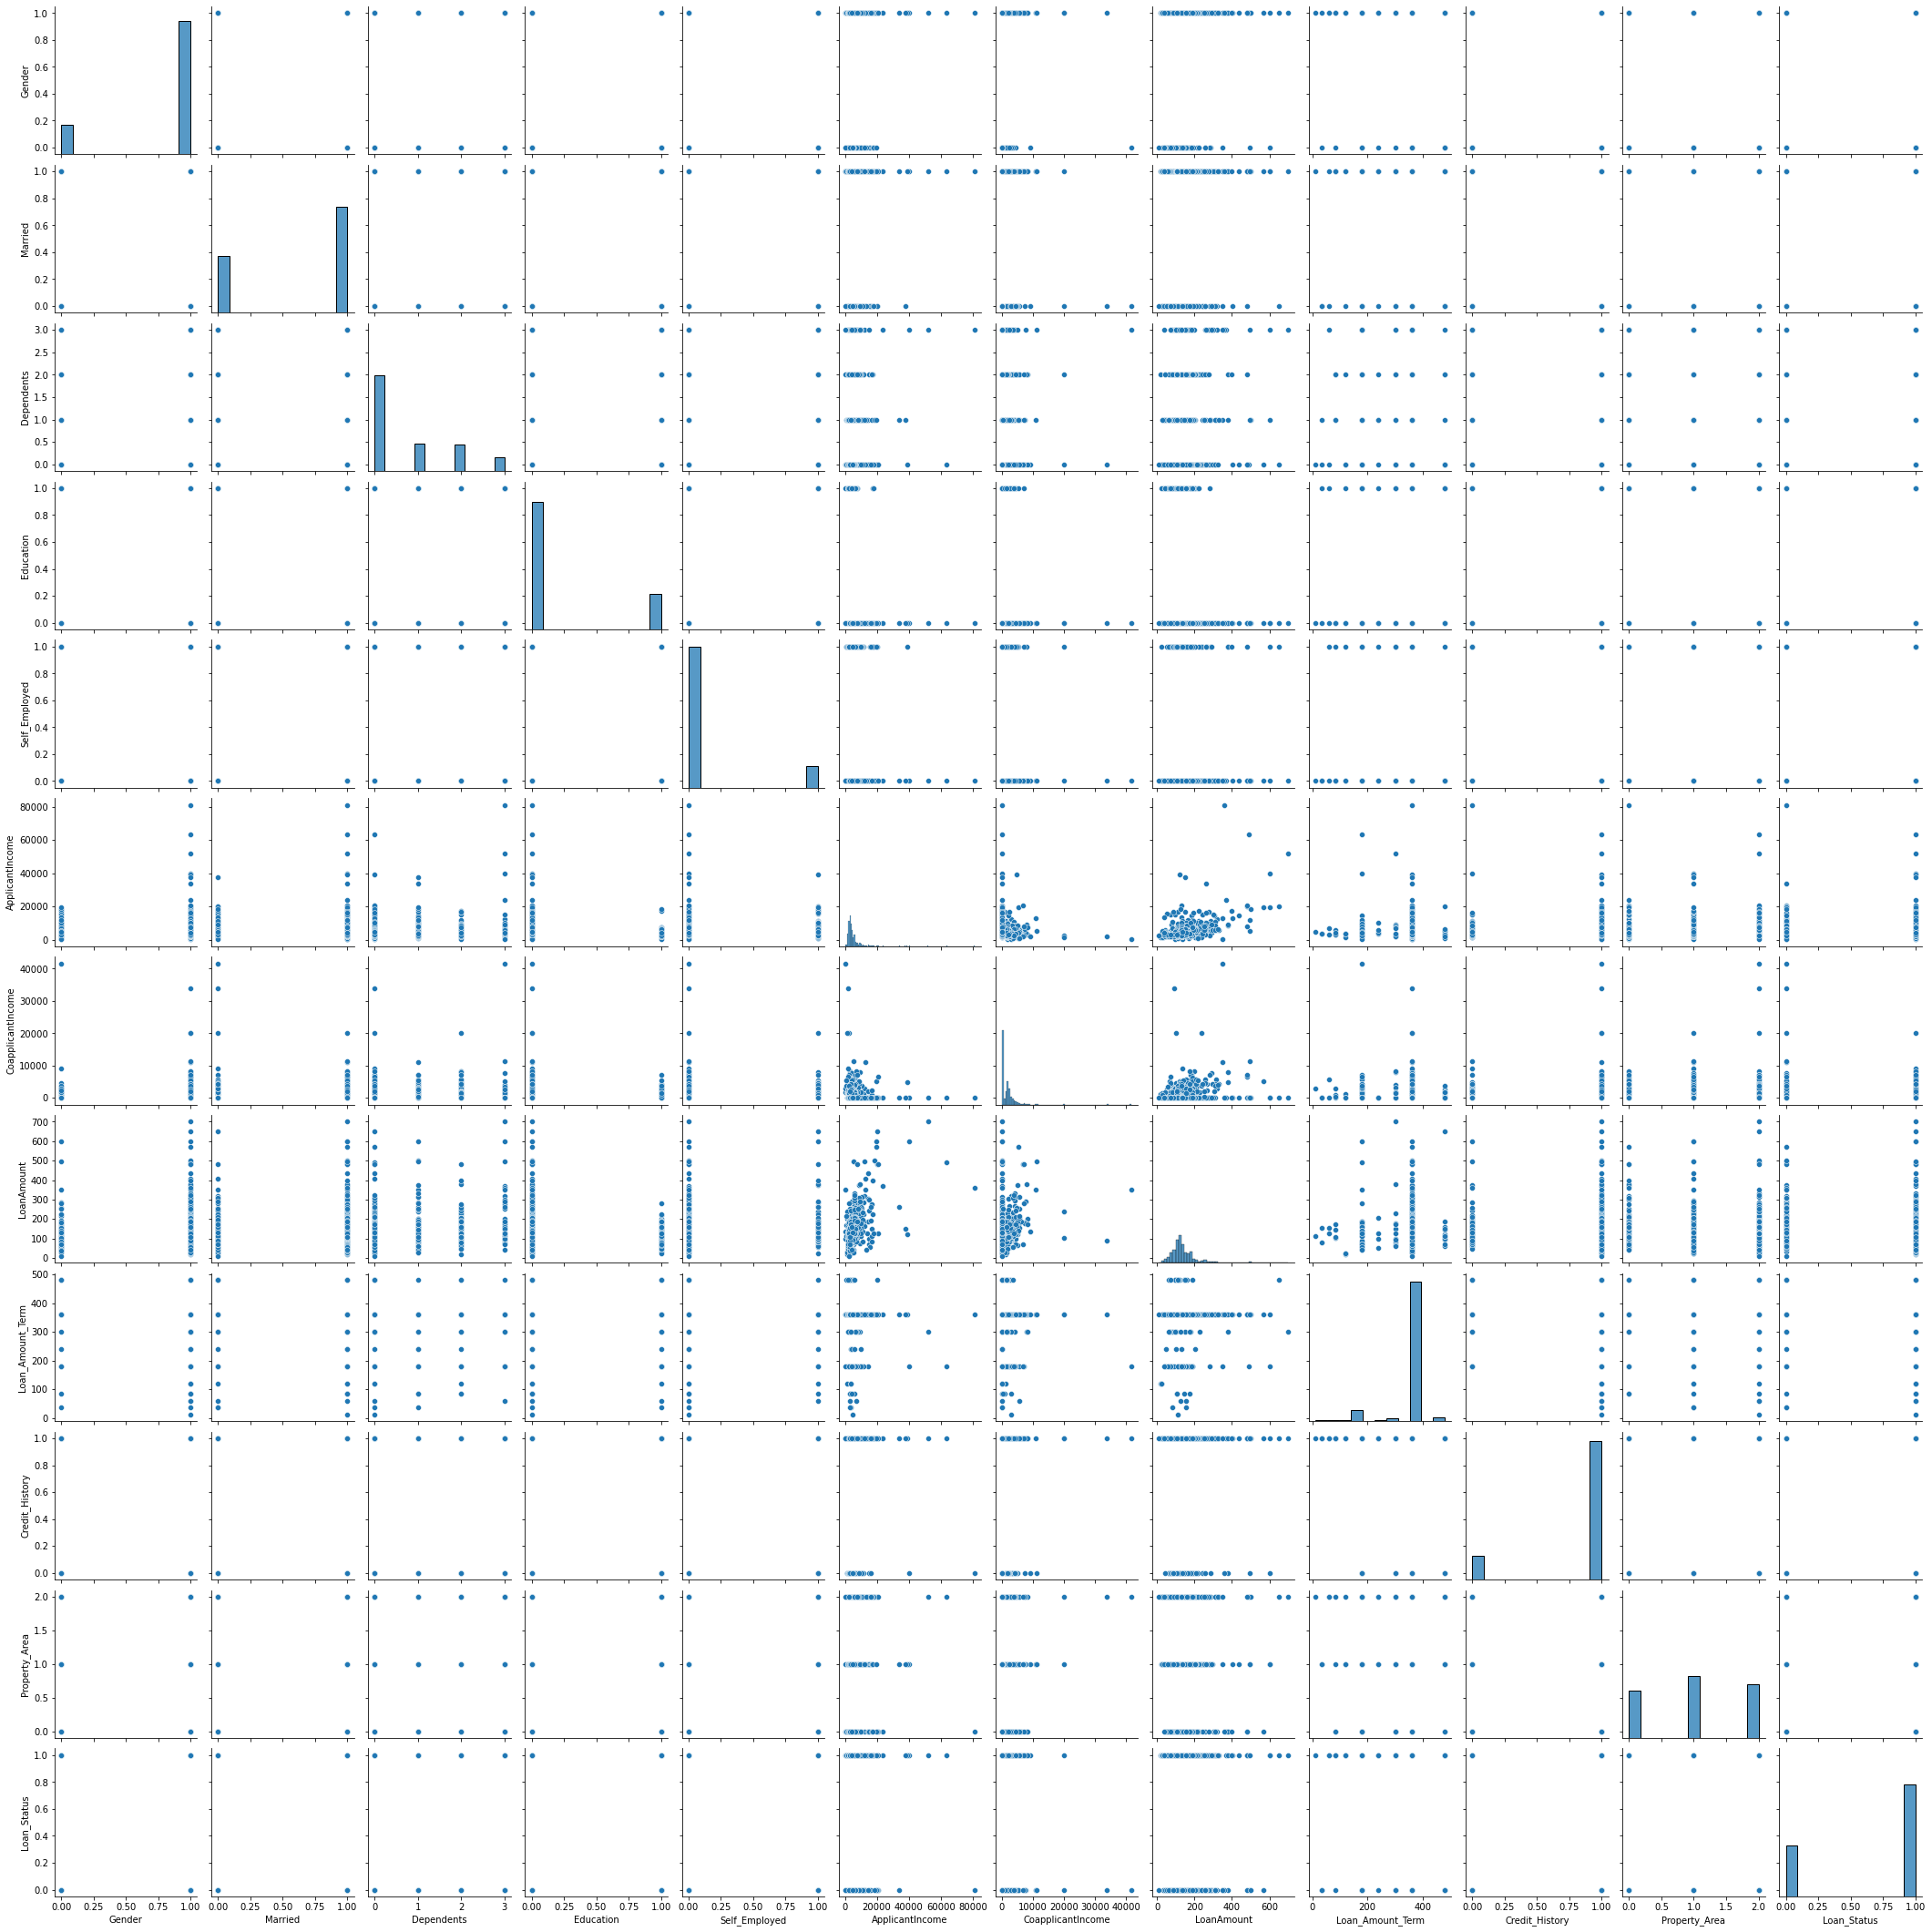

In [56]:
#plotting relationship between all the variables
sns.pairplot(df)

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration. Fields : 'ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History' These fields are some what showing neutral correlation with each other. Credit_History shows strong correlation with target variabel loan status

### Heatmap for checking correlation of encoded features

In [57]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

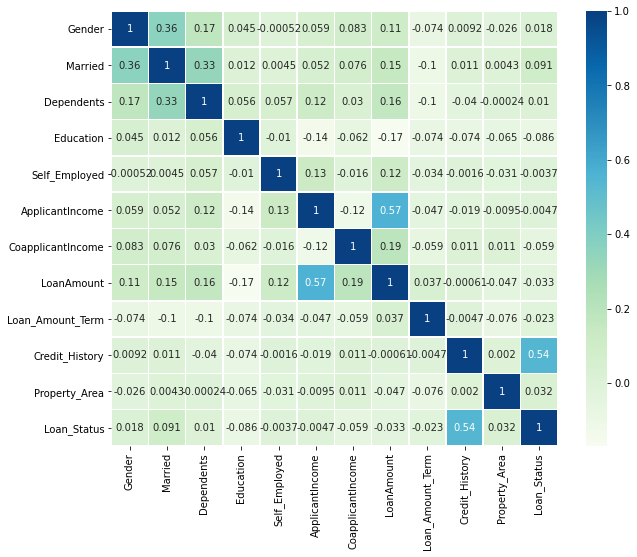

In [58]:
# Plotting heatmap
fig, axis = plt.subplots(figsize=(10, 8))
sns.heatmap(cor,annot=True,linewidths=.5,cmap='GnBu')

- Loan amount and Applicant income have strong correlation.
- Credit history and Loan Status are strongly correlated.

### Removing the Outliers

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3.57).all(axis=1)]

In [60]:
df.shape

(614, 12)

In [61]:
new_df.shape

(585, 12)

In [62]:
# Data loss percentage
Data_loss=(df.shape[0]-new_df.shape[0])/df.shape[0]*100
Data_loss

4.723127035830619

After removing the outliers from the data the shape of the data has change from (614,12) to (585,12) which shows that with the z score method we are able to remove various rows with lossing about 4.73 percent of data , Hence our new data shape is (585,12).

### Chekcking for Skewness

In [63]:
new_df[Numerical].skew()

ApplicantIncome      2.269125
CoapplicantIncome    1.535617
LoanAmount           1.424895
Loan_Amount_Term    -2.157886
dtype: float64

Normal Skewness range is -0.5 to + 0.5 but the columns are out of the range

### Using Power transformation to remove the skewness

In [64]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
new_df[Numerical]=scaler.fit_transform(new_df[Numerical].values)

In [65]:
new_df[Numerical].skew()

ApplicantIncome      0.016696
CoapplicantIncome   -0.175778
LoanAmount           0.062015
Loan_Amount_Term     0.699305
dtype: float64

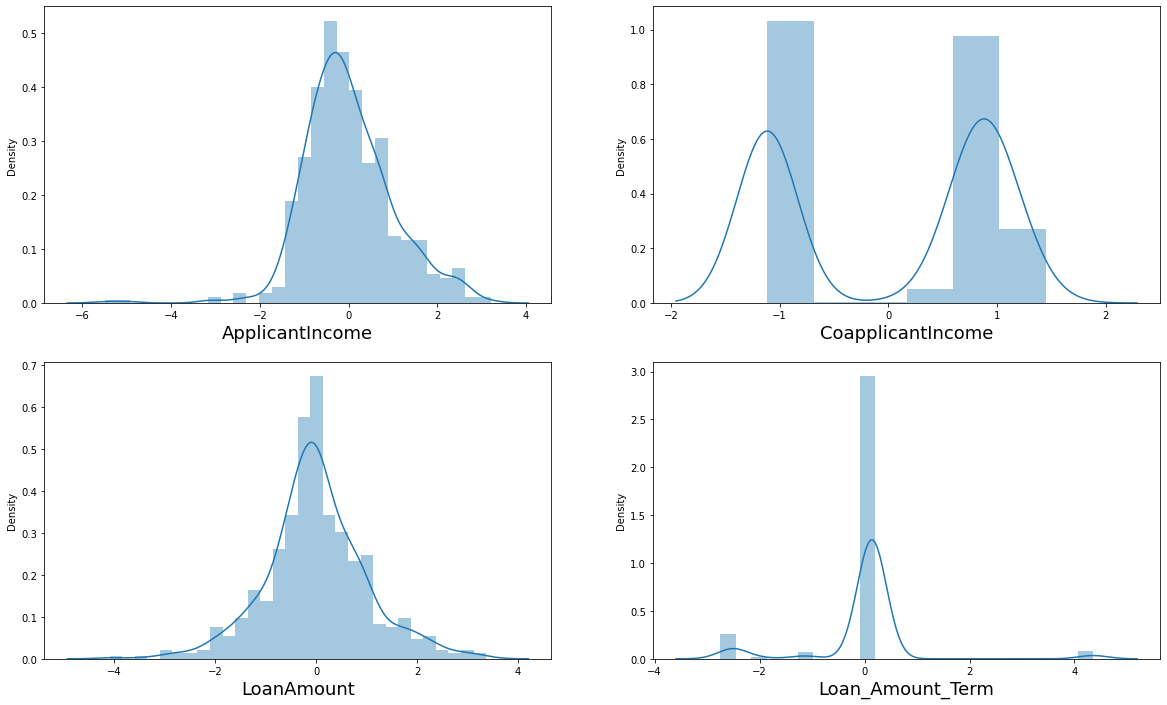

In [66]:
#Plotting distribution plot 
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in new_df[Numerical]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

- After applying the log transformation technique the distribution now looks closer to the normal distribution curve
- Larger Values are Normalized
- Loan Amount shows more or less normal distribution curve.



### Splitting the dataset into indepenedent and dependent variables

In [67]:
x = new_df.drop(['Loan_Status'], axis = 1)
y=new_df['Loan_Status']


### Finding the best random state

In [74]:
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.8806818181818182 on random state 165


In [75]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

In [76]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Model Building

Accuracy score using logistic regression model is 88.06818181818183
F1 Score is  92.19330855018588
Cross validation score 82.05128205128204
-----------------------------
              precision    recall  f1-score   support

           0       0.97      0.61      0.75        51
           1       0.86      0.99      0.92       125

    accuracy                           0.88       176
   macro avg       0.91      0.80      0.83       176
weighted avg       0.89      0.88      0.87       176

-----------------------------

 Confusion Matrix


<AxesSubplot:>

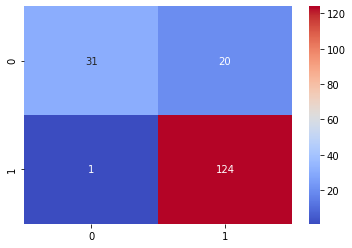

In [77]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_f1=f1_score(y_test,pred)
print("F1 Score is ",lr_f1*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy of Decision Tree classification is  69.31818181818183
F1 Score is  75.67567567567568
Cross validation score 71.28205128205128
              precision    recall  f1-score   support

           0       0.48      0.75      0.58        51
           1       0.87      0.67      0.76       125

    accuracy                           0.69       176
   macro avg       0.67      0.71      0.67       176
weighted avg       0.75      0.69      0.71       176


 Confusion Matrix


<AxesSubplot:>

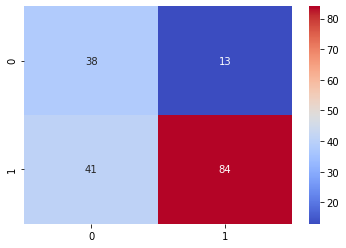

In [78]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
dtc_f1=f1_score(y_test,pred)
print("F1 Score is ",dtc_f1*100)
CV3=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",CV3*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using GuassianNB classifier model is 87.5
F1 Score is  91.66666666666666
Cross validation score 81.36752136752136
-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.65      0.75        51
           1       0.87      0.97      0.92       125

    accuracy                           0.88       176
   macro avg       0.88      0.81      0.83       176
weighted avg       0.88      0.88      0.87       176

-------------------------------

 Confusion Matrix


<AxesSubplot:>

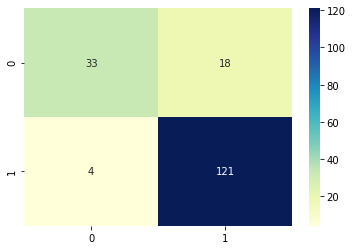

In [79]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
pred=NB.predict(x_test)
gnb_acc=accuracy_score(y_test,pred)
print('Accuracy score using GuassianNB classifier model is',gnb_acc*100)
gnb_cv=cross_val_score(NB,x,y,cv=5).mean()
gnb_f1=f1_score(y_test,pred)
print("F1 Score is ",gnb_f1*100)
print("Cross validation score",gnb_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Random Forest Classificarion is  85.22727272727273
Cross validation score 80.17094017094017
F1 Score is  89.92248062015503
-------------------------------
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        51
           1       0.87      0.93      0.90       125

    accuracy                           0.85       176
   macro avg       0.83      0.80      0.81       176
weighted avg       0.85      0.85      0.85       176

-------------------------------

 Confusion Matrix


<AxesSubplot:>

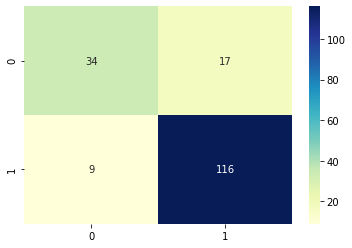

In [80]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
rfc_f1=f1_score(y_test,pred)
print("F1 Score is ",rfc_f1*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Support Vector Classification is  88.06818181818183
F1 Score is  92.0754716981132
Cross validation score 81.36752136752136
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        51
           1       0.87      0.98      0.92       125

    accuracy                           0.88       176
   macro avg       0.89      0.81      0.84       176
weighted avg       0.88      0.88      0.87       176


 Confusion Matrix


<AxesSubplot:>

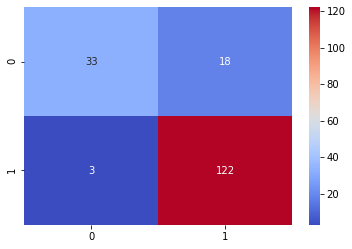

In [81]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
CV2=cross_val_score(svc,x,y,cv=5).mean()
svc_f1=f1_score(y_test,pred)
print("F1 Score is ",svc_f1*100)
print("Cross validation score",CV2*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using gradient boosting classifier model is 88.06818181818183
F1 Score is  91.95402298850574
Cross validation score 78.63247863247864
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        51
           1       0.88      0.96      0.92       125

    accuracy                           0.88       176
   macro avg       0.88      0.82      0.84       176
weighted avg       0.88      0.88      0.88       176


 Confusion Matrix


<AxesSubplot:>

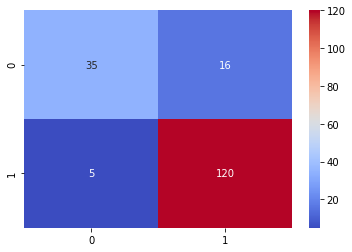

In [82]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
gbc_f1=f1_score(y_test,pred)
print("F1 Score is ",gbc_f1*100)
CV5=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",CV5*100)
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")


In [83]:
model=['Logistic Regression','Decision Tree Classifier',' GuassianNB classifier','Random Forest Classifier',
       'Support Vector Classifier','Gradient boosting classifier']
acc=[lr_acc*100,dtc_acc*100,gnb_acc*100,rfc_acc*100,svc_acc*100,gbc_acc*100]
f1=[lr_f1*100,dtc_f1*100,gnb_f1*100,rfc_f1*100,svc_f1*100,gbc_f1*100]

cv_score=[lr_cv*100,CV3*100,gnb_cv*100,rfc_cv*100,CV2*100,CV5*100]
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'F1_Score':f1,'CV_score':cv_score})
result
# Creting dataframe to store accuracyand cv score of all the models.

,Model,Accuracy_score,F1_Score,CV_score
0,Logistic Regression,88.068182,92.193309,82.051282
1,Decision Tree Classifier,69.318182,75.675676,71.282051
2,GuassianNB classifier,87.500000,91.666667,81.367521
3,Random Forest Classifier,85.227273,89.922481,80.170940
4,Support Vector Classifier,88.068182,92.075472,81.367521
5,Gradient boosting classifier,88.068182,91.954023,78.632479


### Choosing the model
- We will be considering the F1 score as evaluation metrics as there is class imbalanced problem for choosing the best model.
- Logistic Regression is giving highest f1 score of 92.19, so choosing it as best model.


### Applying hyperparamter tuning to best accuracy model

In [84]:
parameters= {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1.1,1.3,1.4,1.6],
    'max_iter':[100,150,200],
    'multi_class':['auto', 'ovr', 'multinomial'],
    }

In [85]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.1, 1.3, 1.4, 1.6], 'max_iter': [100, 150, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [87]:
GCV.best_params_

{'C': 1.1, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2'}

F1 Score using Logistic reression is  92.19330855018588
              precision    recall  f1-score   support

           0       0.97      0.61      0.75        51
           1       0.86      0.99      0.92       125

    accuracy                           0.88       176
   macro avg       0.91      0.80      0.83       176
weighted avg       0.89      0.88      0.87       176

-------------------------------

 Confusion Matrix


<AxesSubplot:>

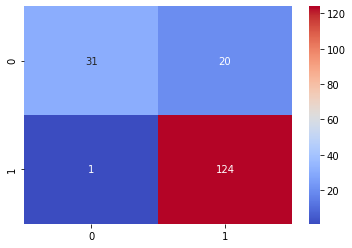

In [88]:
Final_model=LogisticRegression(C=1.1,max_iter=100,multi_class='auto',penalty='l2')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=f1_score(y_test,pred)
print("F1 Score using Logistic reression is ",acc_final*100)
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

### Plotting Roc Curve for best model

In [89]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,pred)

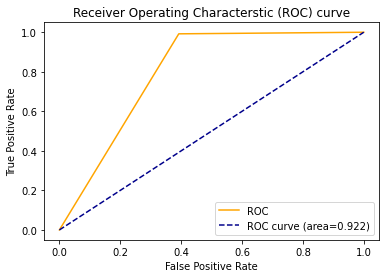

In [90]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

### Conclusion
- Logistic regression is giving highest f1 score of 92.2

### Saving the Model

In [91]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [92]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']